## Import Necessary Libraries

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Data Feteching from Yahoo Finance

In [3]:
#pip install yfinance

In [128]:
# Get the data for tatamotors
ticker = "TATAMOTORS.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [129]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,306.750000,309.850006,303.049988,307.750000,305.850006,44088352
2021-04-05,306.799988,311.700012,297.200012,305.049988,303.166656,66178755
2021-04-06,306.149994,313.799988,304.799988,307.750000,305.850006,63031783
2021-04-07,306.750000,310.649994,305.100006,307.799988,305.899689,39073986
2021-04-08,307.899994,319.799988,307.500000,313.950012,312.011719,62459774


## 2. Select the Target Variable and Clean the data

In [130]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


### 2.1 Plot the time series

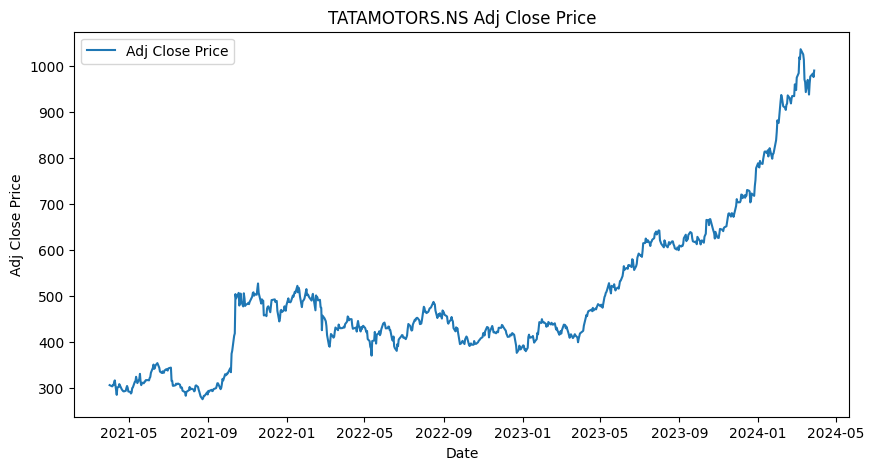

In [131]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('TATAMOTORS.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### 2.2 Decomposition of Time series

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
df.columns

Index(['Adj Close'], dtype='object')

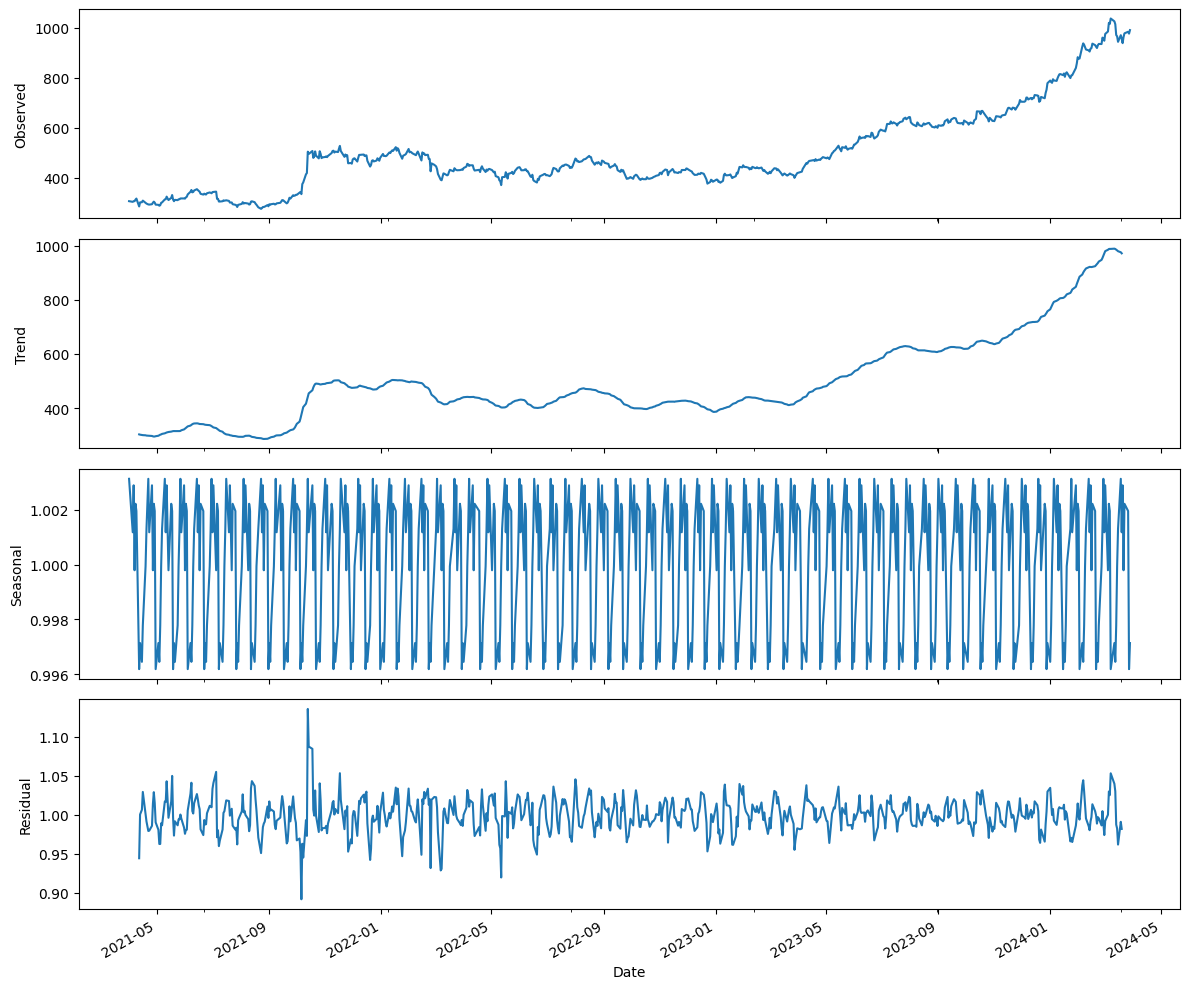

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [36]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## 3. Univariate Forecasting - Conventional Models/Statistical Models

### 3.1 HW Model

In [152]:
monthly_data = df.resample("M").mean()

In [155]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [156]:
len(monthly_data), len(train_data)

(36, 28)

In [157]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

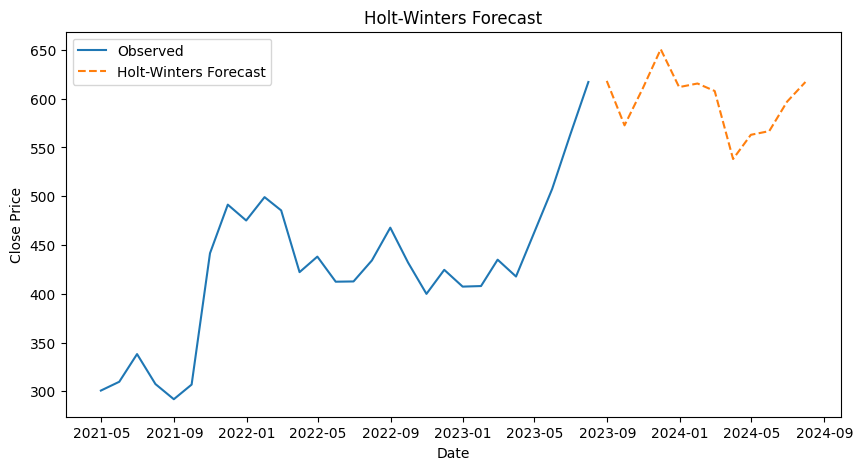

In [159]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [165]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [170]:
len(test_data), len(y_pred)

(8, 8)

In [171]:
y_pred, test_data

(2023-08-31    618.211440
 2023-09-30    572.634961
 2023-10-31    610.873031
 2023-11-30    650.684559
 2023-12-31    611.845329
 2024-01-31    615.535797
 2024-02-29    607.860955
 2024-03-31    538.140022
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-08-31  612.294592
 2023-09-30  620.771844
 2023-10-31  637.751944
 2023-11-30  664.923093
 2023-12-31  721.795102
 2024-01-31  809.848487
 2024-02-29  923.352972
 2024-03-31  982.952796)

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 209.31954401678618
MAE: 144.9673041101031
MAPE: nan
R-squared: -1.4322989202809624


In [175]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [176]:
holt_winters_forecast

2023-08-31    618.211440
2023-09-30    572.634961
2023-10-31    610.873031
2023-11-30    650.684559
2023-12-31    611.845329
2024-01-31    615.535797
2024-02-29    607.860955
2024-03-31    538.140022
2024-04-30    562.952942
2024-05-31    566.730753
2024-06-30    596.872988
2024-07-31    617.087373
2024-08-31    618.211440
2024-09-30    572.634961
2024-10-31    610.873031
2024-11-30    650.684559
2024-12-31    611.845329
2025-01-31    615.535797
2025-02-28    607.860955
2025-03-31    538.140022
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [42]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [44]:
from pmdarima import auto_arima

In [181]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -137.211
Date:                Sun, 21 Jul 2024   AIC                            278.422
Time:                        11:33:17   BIC                            281.013
Sample:                    04-30-2021   HQIC                           279.192
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.7158      8.319      1.408      0.159      -4.589      28.020
sigma2      1519.1166    340.149      4.466      0.000     852.436    2185.797
Ljung-Box (L1) (Q):                   1.43   Jarque-

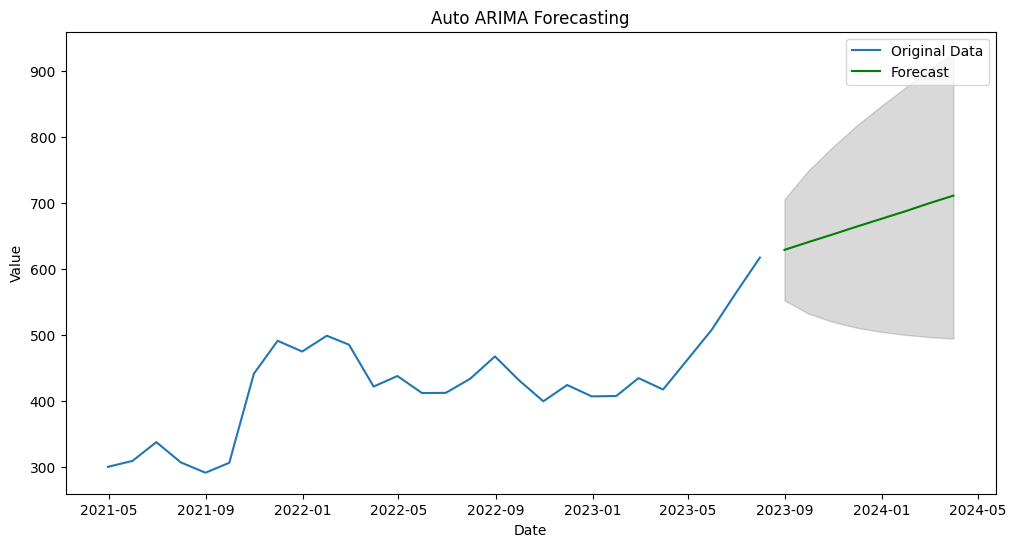

In [183]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [185]:
len(forecast)

8

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 133.39270658783002
MAE: 89.58749039345443
MAPE: nan
R-squared: 0.012216980143434641


### 3.3 ARIMA Daily Data

In [187]:
daily_data= df.copy()

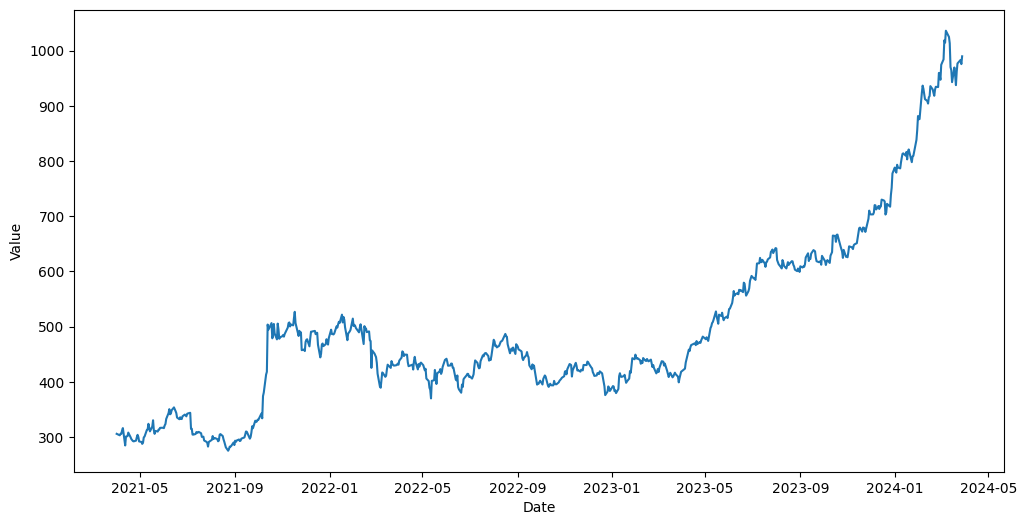

In [188]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [189]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [190]:
# Print the model summary
print(arima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  740
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 7)   Log Likelihood               -2770.164
Date:                           Sun, 21 Jul 2024   AIC                           5558.327
Time:                                   11:37:23   BIC                           5599.775
Sample:                                        0   HQIC                          5574.309
                                           - 740                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6832      0.721      0.947      0.344      -0.730       2.097
ar.L1         -1.3287      0.262     -5.062

In [191]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [192]:
fitted_values

Date
2021-04-01      0.932491
2021-04-05    306.781930
2021-04-06    304.163184
2021-04-07    306.526783
2021-04-08    307.213626
                 ...    
2024-03-21    936.347823
2024-03-22    969.106131
2024-03-26    979.821299
2024-03-27    987.787288
2024-03-28    976.498399
Name: predicted_mean, Length: 740, dtype: float64

In [193]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [194]:
len(forecast)

60

In [195]:
len(future_dates)

60

In [196]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

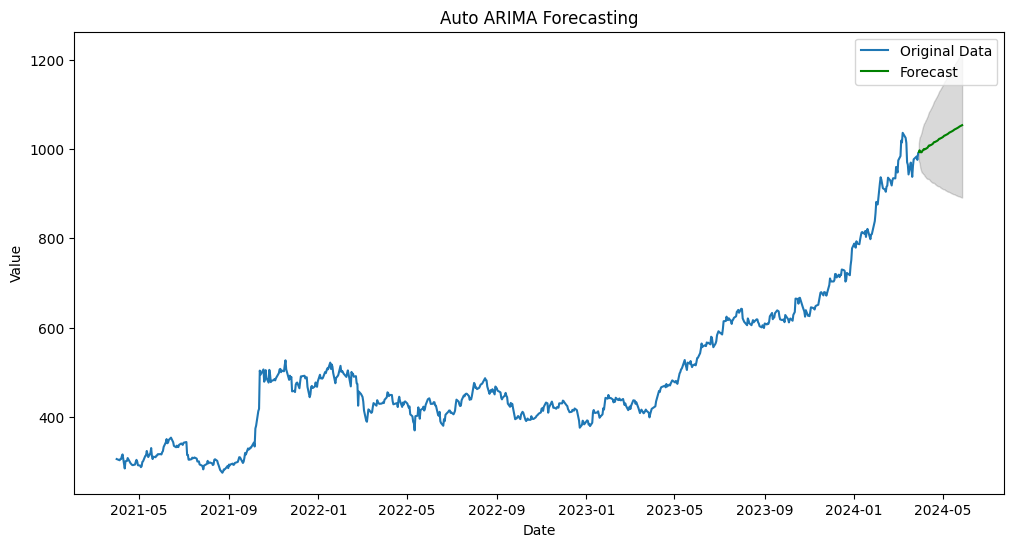

In [197]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

### 2. Multivariate Forecasting - Machine Learning Models

In [115]:
# pip install tensorflow

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [199]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,306.750000,309.850006,303.049988,307.750000,305.850006,44088352
2021-04-05,306.799988,311.700012,297.200012,305.049988,303.166656,66178755
2021-04-06,306.149994,313.799988,304.799988,307.750000,305.850006,63031783
2021-04-07,306.750000,310.649994,305.100006,307.799988,305.899689,39073986
2021-04-08,307.899994,319.799988,307.500000,313.950012,312.011719,62459774


In [213]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [220]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (710, 30, 6)
Shape of y: (710,)


In [224]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [225]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [226]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0092 - val_loss: 0.0410
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048 - val_loss: 0.0086
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0

In [227]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000023D4A686B60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


In [228]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 597.3339883139033, True Value: 603.6870727539062
Prediction: 596.5142247530512, True Value: 599.1510620117188
Prediction: 595.4682280364505, True Value: 609.3197021484375
Prediction: 595.0952392443378, True Value: 607.12646484375
Prediction: 595.2259633240101, True Value: 609.2698364257812
Prediction: 595.7576350492618, True Value: 608.3726196289062
Prediction: 596.3215286161812, True Value: 613.00830078125
Prediction: 597.2409508639648, True Value: 625.3203125
Prediction: 599.288409675748, True Value: 632.8969116210938
Prediction: 602.7760328844342, True Value: 618.89013671875


In [229]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 33.885630101505676
MAE: 27.369713781540813
MAPE: 3.628508995506615
R-squared: 0.9351334053452002


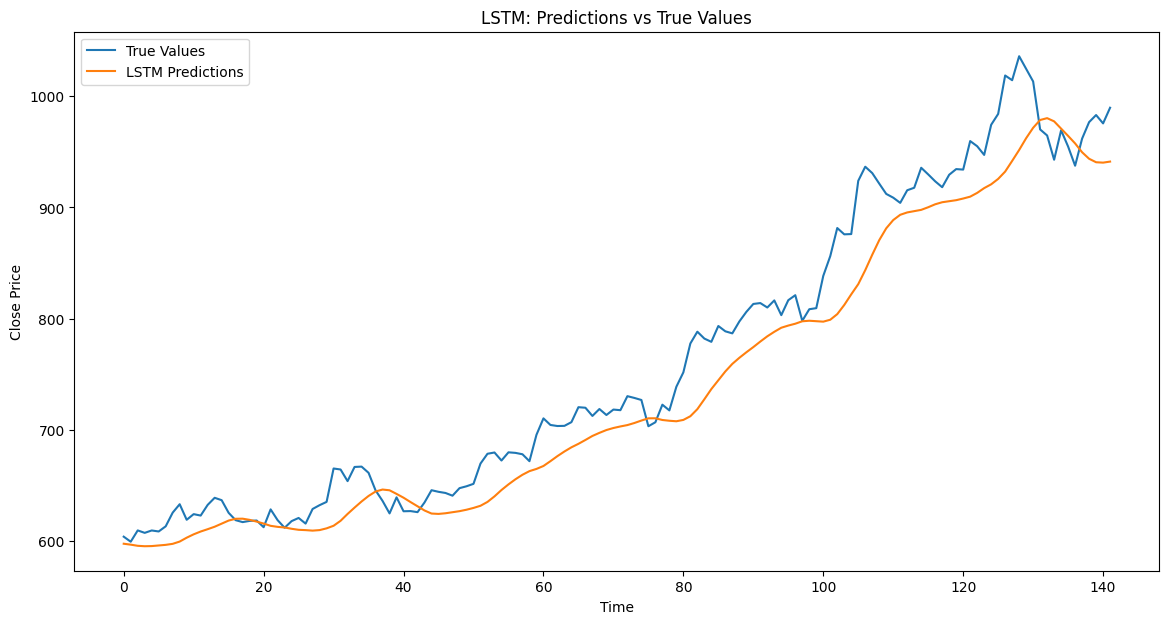

In [231]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Tree Based Models

In [233]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [236]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [238]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [241]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0003139581946429365


In [242]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.017718865501011528
MAE: 0.013220213313078289
MAPE: 634328.395736698
R-squared: 0.9936422672268123


In [243]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0001547894585607197


In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.012441441176998736
MAE: 0.009493679018180252
MAPE: 672979.4565946095
R-squared: 0.9968654743515941


In [245]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.23054136737523295, True Value: 0.2323700255680043
Prediction: 0.21499777273667647, True Value: 0.21610803522645766
Prediction: 0.877556670074076, True Value: 0.9124094705498673
Prediction: 0.18423715248495282, True Value: 0.16281575659048136
Prediction: 0.18828633565728653, True Value: 0.18051449822881832
Prediction: 0.2930422347364678, True Value: 0.3008140721649361
Prediction: 0.29376063043945794, True Value: 0.31772912033888095
Prediction: 0.04558577907809991, True Value: 0.041340662512370674
Prediction: 0.04558577907809991, True Value: 0.027691023827987438
Prediction: 0.85980273819023, True Value: 0.866485089689363


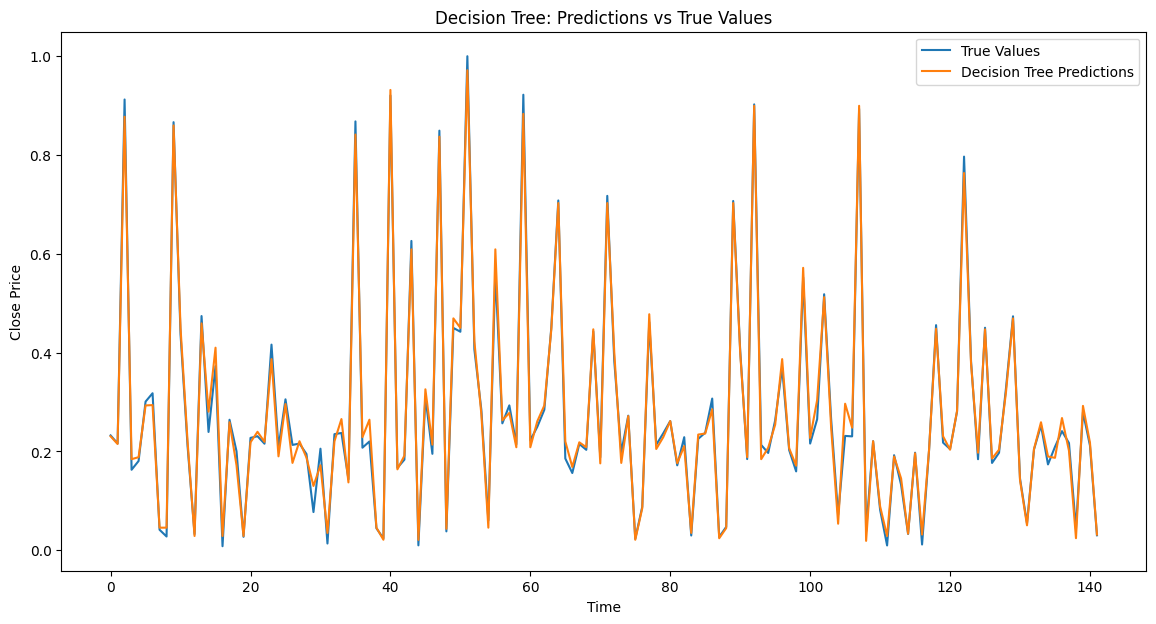

In [246]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [247]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.23065108365806394, True Value: 0.2323700255680043
Prediction: 0.2014676810976056, True Value: 0.21610803522645766
Prediction: 0.8991798288316241, True Value: 0.9124094705498673
Prediction: 0.16060699082325802, True Value: 0.16281575659048136
Prediction: 0.1980578841391498, True Value: 0.18051449822881832
Prediction: 0.29022938726554093, True Value: 0.3008140721649361
Prediction: 0.3164255471956418, True Value: 0.31772912033888095
Prediction: 0.04434490261528768, True Value: 0.041340662512370674
Prediction: 0.031763742671950715, True Value: 0.027691023827987438
Prediction: 0.8612551713781457, True Value: 0.866485089689363


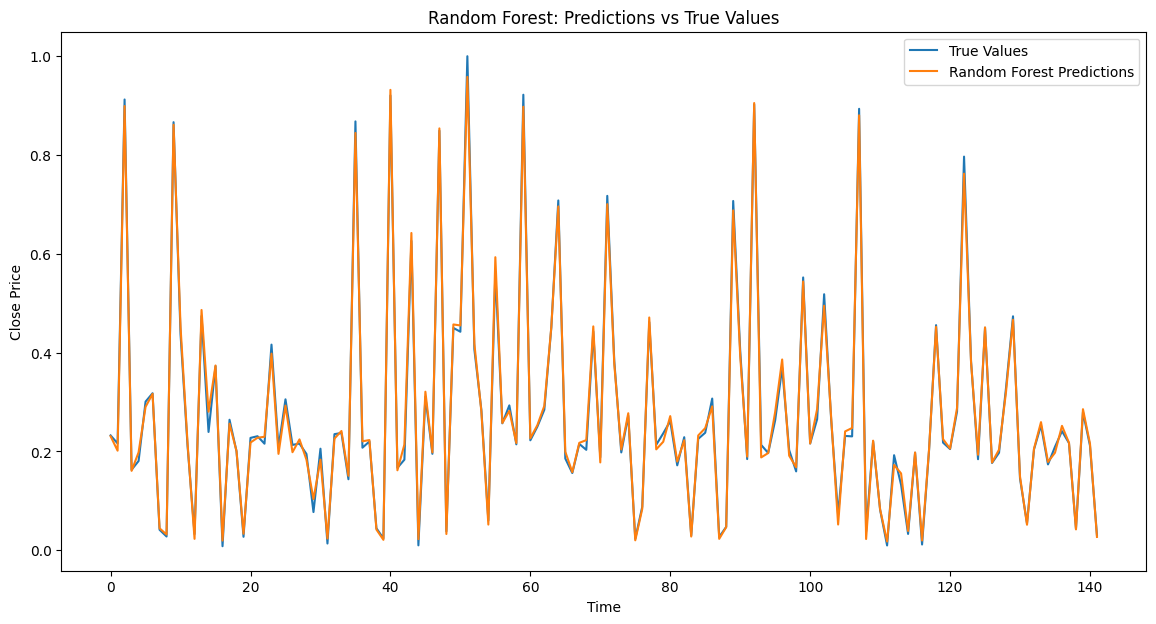

In [248]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

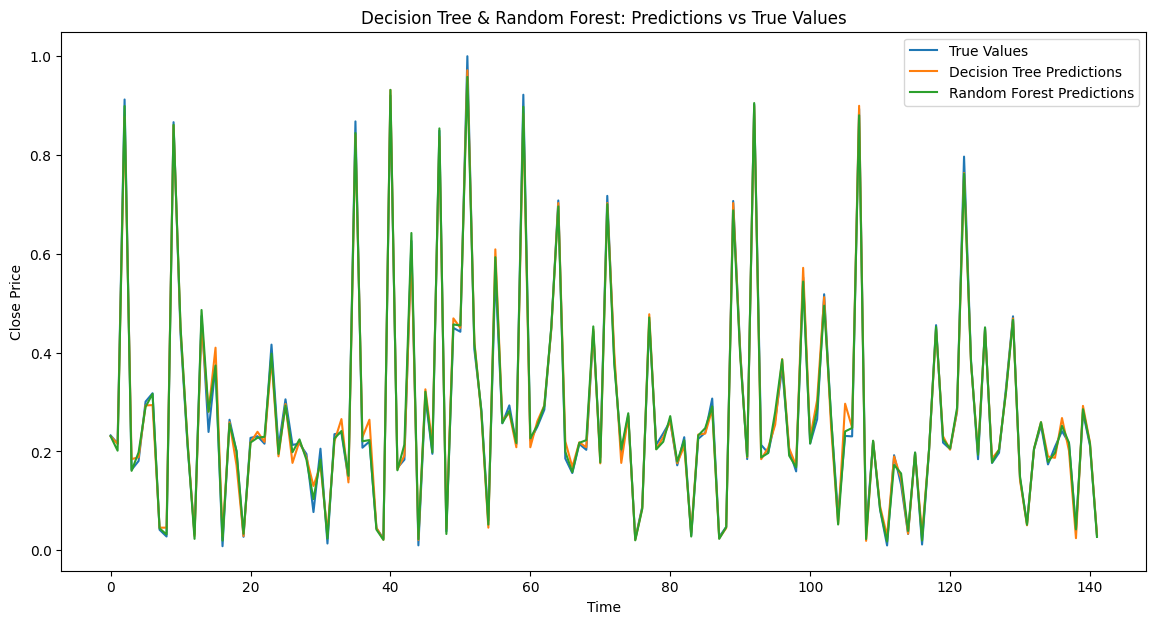

In [249]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()